In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Data

In [24]:
data = pd.read_csv('data/Data_HW_001.txt', sep='\t')
data.head()

,HHID,CHOSEN,INCOME,HHSIZE,NUMVEH,WOMEN,MEN,NWORK,NCHILD,NYCHILD,...,WALKBIKE,TELECO,PSENIORS,GRAD,POPDENSE,NEIGHB,SMARTPH,SPOOL,CABLE,COST
0,1,1,1,2,1,1,1,2,0,0,...,1,0,0,0,1181.496012,0,1,0,0,0.855287
1,2,2,2,2,2,1,1,1,1,0,...,0,0,0,0,125.444574,1,0,1,0,0.878066
2,3,2,3,1,3,0,1,1,0,0,...,0,0,0,0,904.303281,1,0,0,1,0.743314
3,4,1,1,3,2,3,0,3,0,0,...,0,0,0,0,930.560746,0,1,0,0,0.695418
4,5,2,2,1,0,0,1,1,0,0,...,0,1,0,0,11125.061470,1,0,0,1,0.403656


In [25]:
data['CHOSEN_BINARY'] = data['CHOSEN'].apply(lambda x: int(x == 1))

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HHID,2775.0,1388.000000,801.217823,1.000000,694.500000,1388.000000,2081.500000,2775.000000
CHOSEN,2775.0,1.840000,0.366672,1.000000,2.000000,2.000000,2.000000,2.000000
INCOME,2775.0,1.772613,0.750275,1.000000,1.000000,2.000000,2.000000,3.000000
HHSIZE,2775.0,2.575495,1.559668,1.000000,1.000000,2.000000,3.000000,7.000000
NUMVEH,2775.0,1.147027,0.910171,0.000000,0.000000,1.000000,2.000000,4.000000
WOMEN,2775.0,1.295856,1.247940,0.000000,0.000000,1.000000,2.000000,7.000000
MEN,2775.0,1.279640,1.224156,0.000000,0.000000,1.000000,2.000000,7.000000
NWORK,2775.0,1.383423,0.766089,1.000000,1.000000,1.000000,2.000000,7.000000
NCHILD,2775.0,0.803604,1.144556,0.000000,0.000000,0.000000,1.000000,6.000000
NYCHILD,2775.0,0.174054,0.551896,0.000000,0.000000,0.000000,0.000000,5.000000


## 1. Examine Characteristics of Data Set

In [27]:
print('N° Examples: {}\nN° Columns: {}'.format(data.shape[0], data.shape[1]))

N° Examples: 2775
N° Columns: 26


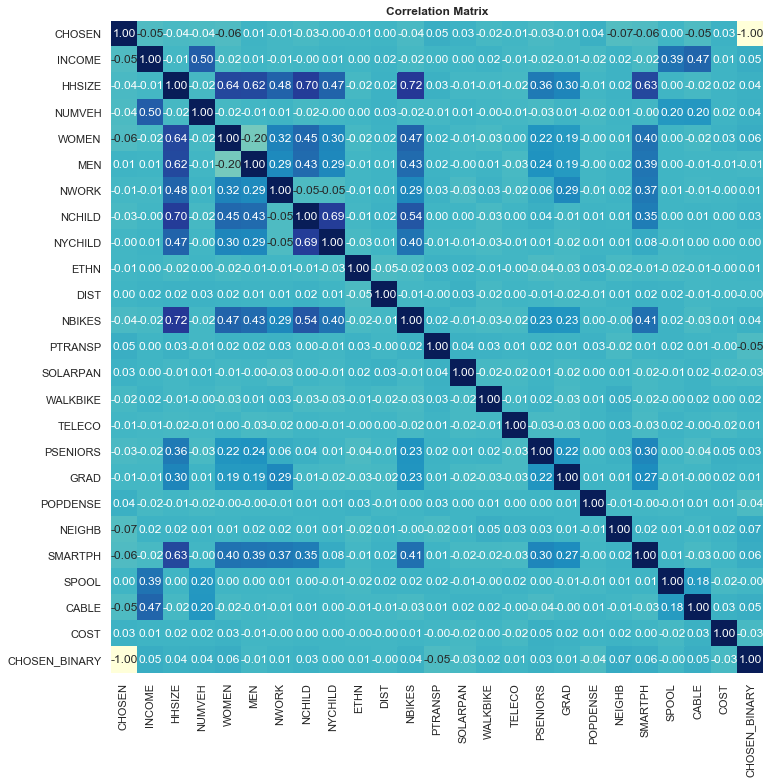

In [28]:
plt.figure(figsize=(12, 12))
ax = sns.heatmap(data.drop('HHID', axis=1).corr(), cmap='YlGnBu', square=True, cbar=False, annot=True, fmt=".2f");
plt.title('Correlation Matrix', fontweight='bold')
plt.savefig('figures/correlation_matrix.png');

Each observations of the Data Set consists on characteristics of a household and the yearly expected cost of get the electric vehicle. The goal is to understand which attributes are important in the decision of adopt a new electric vehicle or not. We will start exploring the dataset to understand the characteristics of the households in the sample.

### Socio-Demographic Characteristics of the Dataset

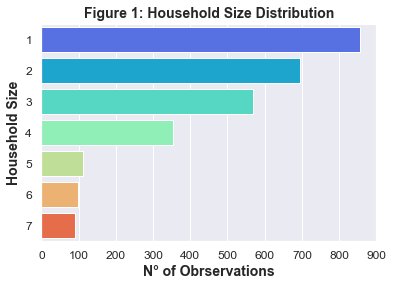

In [29]:
sns.set_style('darkgrid')
plt.figure(figsize=(6, 4))
ax = sns.countplot(y='HHSIZE', data=data, palette="rainbow", )
ax.set_ylabel('Household Size', fontweight='bold', fontsize=14)
ax.set_xlabel('N° of Obrservations', fontweight='bold', fontsize=14)
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)
ax.set_title('Figure 1: Household Size Distribution', fontweight='bold', fontsize=14);
plt.savefig('figures/hhsize-dist.png', dpi=100);

The number of people that lives in each household varies from 1 to 7 with an average of ~2.58 people per household. The vast majority of the observations corresponds to households composed of 1 - 4 people, as can be seen in the figure. There is a great amount of people who lives alone. They has less probability of adopt the electric car.

In [30]:
data['ALONE'] = data['HHSIZE'].apply(lambda n: int(n == 1))
data.pivot_table(columns='ALONE', values='CHOSEN_BINARY')

ALONE,0,1
CHOSEN_BINARY,0.168926,0.140023


---

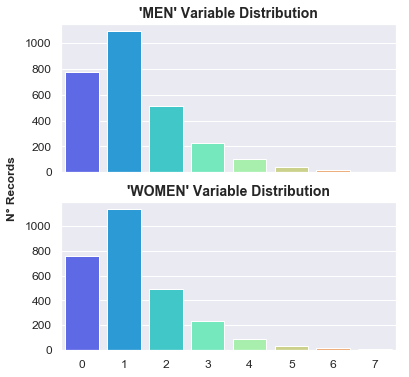

In [31]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(6, 6))
fig.subplots_adjust(hspace=0.2)
sns.countplot(data['WOMEN'], ax=ax.flat[0], palette='rainbow')
ax[0].set_xlabel(None)
sns.countplot(data['MEN'], ax=ax.flat[1], palette='rainbow')
ax[1].set_xlabel(None)
for label in ax[1].get_xticklabels():
    label.set_fontsize(12)
for label0, label1 in zip(ax[0].get_yticklabels(), ax[1].get_yticklabels()):
    label0.set_fontsize(12)
    label1.set_fontsize(12)
ax[0].set_ylabel(None)
ax[1].set_ylabel(None)
ax[0].set_title("'MEN' Variable Distribution", fontsize=14, fontweight='bold')
ax[1].set_title("'WOMEN' Variable Distribution", fontsize=14, fontweight='bold')
fig.text(0, 0.5, 'N° Records', va='center', rotation='vertical', fontsize=12, fontweight='bold');
plt.savefig('figures/men-women-comp.png', dpi=100)

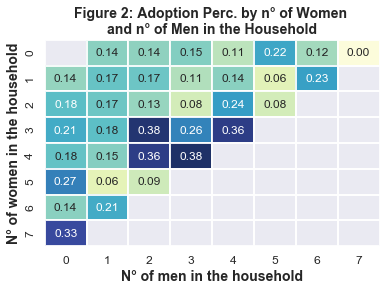

In [32]:
fig, ax = plt.subplots(figsize=(6, 3.8))
sns.heatmap(data.pivot_table(columns='MEN', index='WOMEN', values='CHOSEN_BINARY'),
           annot=True, annot_kws={"size":12}, cbar=False, cmap='YlGnBu', fmt='.2f', lw=1, ax=ax, alpha=0.9, linecolor='white');
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)
ax.set_xlabel('N° of men in the household', fontsize=14, fontweight='bold')
ax.set_ylabel('N° of women in the household', fontsize=14, fontweight='bold')
ax.set_title('Figure 2: Adoption Perc. by n° of Women \nand n° of Men in the Household', fontweight='bold', fontsize=14)
plt.savefig('figures/adopt-perc-women-men.png', dpi=100)

Naturally, the WOMEN and MEN variables distribution is pretty similar across the Data Set and the adoption percentage seems to increase as both increases (particularly the WOMEN variable). Nevertheless, this increase may be due to the fact that there are less households that has a higher number of people, what affects the confidence of the estimation.

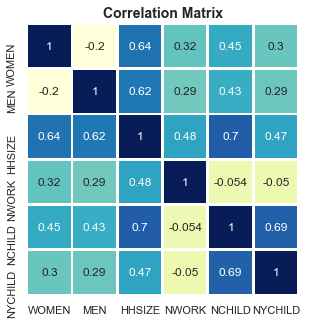

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data[['WOMEN', 'MEN', 'HHSIZE', 'NWORK', 'NCHILD', 'NYCHILD']].corr(), annot=True,
           square=True, lw=2, cbar=False, ax=ax, annot_kws=dict(size=12), cmap='YlGnBu')
ax.set_title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.savefig('figures/corr-mat-hhsize.png', dpi=100)

All variables that refers to number of people (e.g. WOMEN, MEN, NWORK) seems to be relatively high correlated with HHSIZE. In fact, WOMEN + MEN = HHSIZE. Hence, we expect that only a few of them will appear in the final model.

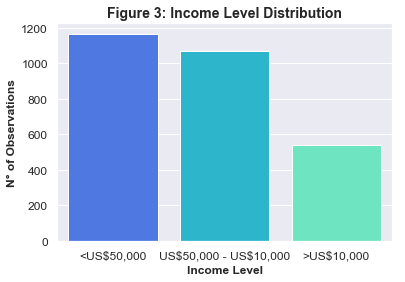

In [34]:
ax = plt.axes()
sns.countplot(x='INCOME', data=data, palette=sns.color_palette("rainbow"), ax=ax)
ax.set_xlabel('Income Level', fontweight='bold', fontsize=12)
ax.set_ylabel('N° of Observations', fontweight='bold', fontsize=12)
ax.set_xticklabels(['<US\$50,000', 'US\$50,000 - US\$10,000', '>US$10,000'], fontsize=12)
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)
ax.set_title('Figure 3: Income Level Distribution', fontweight='bold', fontsize=14)
plt.savefig('figures/income-dist.png', dpi=100)

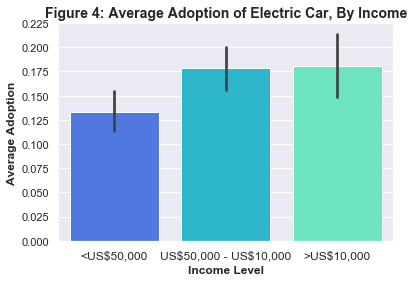

In [35]:
ax = plt.axes()
sns.barplot(x='INCOME', y='CHOSEN_BINARY', data=data, palette=sns.color_palette("rainbow"), ax=ax)
ax.set_xticklabels(['<US\$50,000', 'US\$50,000 - US\$10,000', '>US$10,000'], fontsize=12)
ax.set_ylabel('Average Adoption', fontsize=12, fontweight='bold')
ax.set_xlabel('Income Level', fontsize=12, fontweight='bold')
ax.set_title('Figure 4: Average Adoption of Electric Car, By Income', fontsize=14, fontweight='bold')
plt.savefig('figures/adoption-by-income.png', dpi=100)

The INCOME distribution shows that there are more households on the lower and mid income level. We could naturally ask if households with higher income levels tend to adopt easily this technology. It appears that there is a ~5% increment in the adoption percentage from low to mid income level, and has a slightly increase from mid to high income. Again, the fact that there are less observations on the high-income levels increases the confidence intervals.

### Characteristics of the Data Set Related to Transportation Method

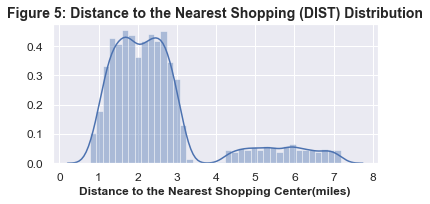

In [36]:
plt.figure(figsize=(6, 3))
ax = sns.distplot(data['DIST'])
plt.title("Figure 5: Distance to the Nearest Shopping (DIST) Distribution", fontsize=14, fontweight='bold')
plt.xlabel('Distance to the Nearest Shopping Center(miles)', fontsize=12, fontweight='bold')
for label in ax.get_xticklabels():
    label.set_fontsize(12)
for label in ax.get_yticklabels():
    label.set_fontsize(12)
plt.tight_layout()
plt.savefig('figures/distance-distribution.png', dpi=100)

The DIST variable distribution shows clearly two groups that can be converted to a categorical variable representing short and long distances.

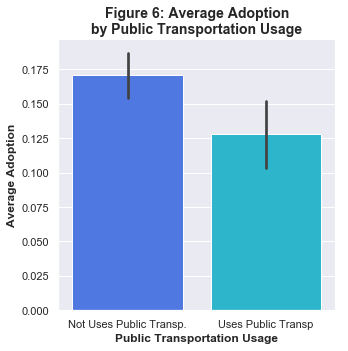

In [37]:
g = sns.catplot(x='PTRANSP', y='CHOSEN_BINARY', data=data, kind='bar', palette=sns.color_palette("rainbow"))
plt.title('Figure 6: Average Adoption\nby Public Transportation Usage', fontsize=14, fontweight='bold')
plt.xlabel('Public Transportation Usage', fontsize=12, fontweight='bold')
plt.ylabel('Average Adoption', fontsize=12, fontweight='bold')
g.axes.flat[0].set_xticklabels(['Not Uses Public Transp.', 'Uses Public Transp'])
plt.subplots_adjust(top=0.88)
plt.savefig('figures/ptransp-adopt.png', dpi=100)

In [38]:
data.pivot_table(columns='INCOME', values='PTRANSP')

INCOME,1,2,3
PTRANSP,0.260274,0.254206,0.26257


Households in which at least one person uses public transport has least probability of adopt the electric vehicle. We could explain this by saying that people that uses public transportation has a lower income level and therefore, they can’t afford an electric vehicle, Nevertheless, if we take a look to the average usage of public transportation across the income levels, we see that it is nearly the same for all of them, and in fact a little greater for the high income level.

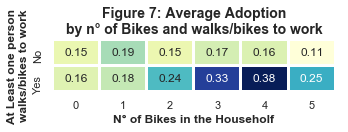

In [39]:
fig, ax = plt.subplots(figsize=(5, 2))
ax = sns.heatmap(data.pivot_table(columns='NBIKES', index='WALKBIKE', aggfunc='mean', values='CHOSEN_BINARY'),
            cmap='YlGnBu', annot=True, fmt='.2f', cbar=False, lw=2, annot_kws=dict(size=12), ax=ax);
ax.set_yticklabels(['No', 'Yes'])

plt.title("Figure 7: Average Adoption\nby n° of Bikes and walks/bikes to work", fontsize=14, fontweight='bold')
plt.xlabel('N° of Bikes in the Householf', fontsize=12, fontweight='bold')
plt.ylabel('At Least one person\nwalks/bikes to work', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('figures/adopt-bike-wbike.png', dpi=100)

Households with people who walks or bikes to work has higher chance to adopt the vehicle than those who not and this chance increases with the number of bikes in the household. It's important to note that the majority of households in the dataset doesn’t has any bike, and this can be affecting the estimation.

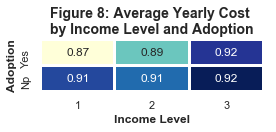

In [40]:
fig, ax = plt.subplots(figsize=(4, 2))
sns.heatmap(data.pivot_table(index='INCOME', columns='CHOSEN', values='COST').T,
            cmap='YlGnBu', annot=True, fmt='.2f', cbar=False, lw=2, annot_kws=dict(size=12), ax=ax)
plt.title("Figure 8: Average Yearly Cost \nby Income Level and Adoption", fontsize=14, fontweight='bold')
plt.ylabel('Adoption', fontsize=12, fontweight='bold')
plt.xlabel('Income Level', fontsize=12, fontweight='bold')
ax.set_yticklabels(['Yes', 'Np'])
plt.tight_layout()
plt.savefig('figures/cost-income-adopt.png', dpi=100);

The yearly mean cost of adopting the electric vehicle is US$9,095. We see that households that actually adopted the electric car, were offered to lower yearly costs, especially on low- and mid-income levels. Also, we see that higher income levels tend to accept higher yearly costs, as expected.

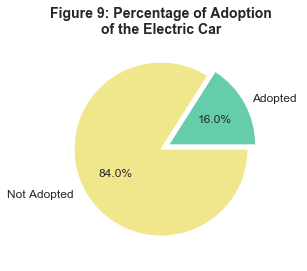

In [41]:
perc = [data['CHOSEN_BINARY'].mean(), 1 - data['CHOSEN_BINARY'].mean()]
explode = (0.1, 0.0)
plt.pie(perc, labels=['Adopted ', 'Not Adopted '], colors=['mediumaquamarine', 'khaki'],
        explode=explode, autopct='%1.1f%%', textprops=dict(fontsize=12))
plt.title('Figure 9: Percentage of Adoption\nof the Electric Car', fontweight='bold', fontsize=14)
plt.savefig('figures/chosen-pie.png', dpi=100, transparent=False);

### Additional Notes:
●	Strangely, households that has solar panels has less probability of adopting the electric car.

●	People seems to be influenced by their neighbors. Households that has neighbors that have electric cars has a ~5% more chance to adopt the technology according to the dataset.

●	Households that has at least one senior member seems to adopt the technology easily.


In [42]:
data.pivot_table(columns='PSENIORS', values='CHOSEN_BINARY')

PSENIORS,0,1
CHOSEN_BINARY,0.154706,0.1875


In [44]:
data.pivot_table(columns='NCHILD', values='PTRANSP')

NCHILD,0,1,2,3,4,5,6
PTRANSP,0.260093,0.257468,0.257962,0.219178,0.267857,0.30303,0.416667
